In [61]:
%matplotlib inline

import moabb
from moabb.datasets import BNCI2014001
from moabb.paradigms import LeftRightImagery
from moabb.evaluations import CrossSessionEvaluation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

from mne.decoding import CSP

import matplotlib.pyplot as plt
import seaborn as sns

moabb.set_log_level('info')
import warnings
warnings.filterwarnings("ignore")

In [14]:
dataset = BNCI2014001()

paradigm = LeftRightImagery()

evaluation = CrossSessionEvaluation(paradigm=paradigm, datasets=[dataset], overwrite=True)

pipelines = make_pipeline(CSP(n_components=8), LDA())

results = evaluation.process({'csp+lda':pipelines}) 

2019-08-22 13:03:55 desktop-270 root[18265] INFO Processing dataset: 001-2014
2019-08-22 13:04:02 desktop-270 root[18265] INFO csp+lda | 001-2014 | 1 | session_E: Score 0.955
2019-08-22 13:04:02 desktop-270 root[18265] INFO csp+lda | 001-2014 | 1 | session_T: Score 0.932
2019-08-22 13:04:09 desktop-270 root[18265] INFO csp+lda | 001-2014 | 2 | session_E: Score 0.646
2019-08-22 13:04:09 desktop-270 root[18265] INFO csp+lda | 001-2014 | 2 | session_T: Score 0.527
2019-08-22 13:04:16 desktop-270 root[18265] INFO csp+lda | 001-2014 | 3 | session_E: Score 0.996
2019-08-22 13:04:16 desktop-270 root[18265] INFO csp+lda | 001-2014 | 3 | session_T: Score 0.994
2019-08-22 13:04:22 desktop-270 root[18265] INFO csp+lda | 001-2014 | 4 | session_E: Score 0.829
2019-08-22 13:04:22 desktop-270 root[18265] INFO csp+lda | 001-2014 | 4 | session_T: Score 0.829
2019-08-22 13:04:29 desktop-270 root[18265] INFO csp+lda | 001-2014 | 5 | session_E: Score 0.572
2019-08-22 13:04:30 desktop-270 root[18265] INFO 

In [20]:
results

,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.955440,0.164243,144.0,1,session_E,22,2,001-2014,csp+lda
1,0.931713,0.137700,144.0,1,session_T,22,2,001-2014,csp+lda
2,0.646219,0.166583,144.0,2,session_E,22,2,001-2014,csp+lda
3,0.527199,0.138243,144.0,2,session_T,22,2,001-2014,csp+lda
4,0.996335,0.168886,144.0,3,session_E,22,2,001-2014,csp+lda
5,0.993827,0.142990,144.0,3,session_T,22,2,001-2014,csp+lda
6,0.828704,0.170337,144.0,4,session_E,22,2,001-2014,csp+lda
7,0.828897,0.142632,144.0,4,session_T,22,2,001-2014,csp+lda
8,0.571952,0.169820,144.0,5,session_E,22,2,001-2014,csp+lda
9,0.620949,0.138703,144.0,5,session_T,22,2,001-2014,csp+lda


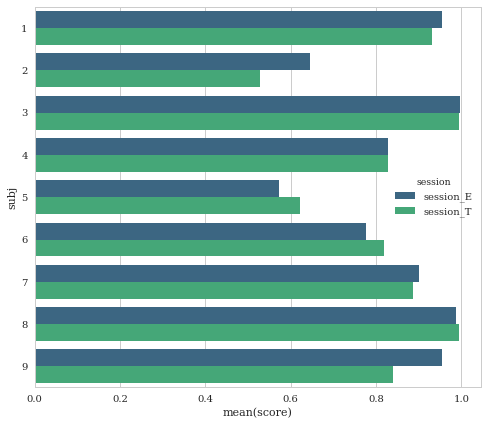

In [69]:
fig, ax = plt.subplots(figsize=(8,7))
results["subj"] = results["subject"].apply(str)
sns.barplot(x="score", y="subj", hue='session', data=results, orient='h', palette='viridis', ax=ax)
#sns.catplot(kind='bar', x="score", y="subj", hue='session', data=results, orient='h', palette='viridis')
fig.show()